# Get and explore dataset

In [44]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re

In [45]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [46]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [47]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [48]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [49]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Mean Review Size:  25
Standard Deviation:  11.28


Text(0.5, 0, 'Word Count')

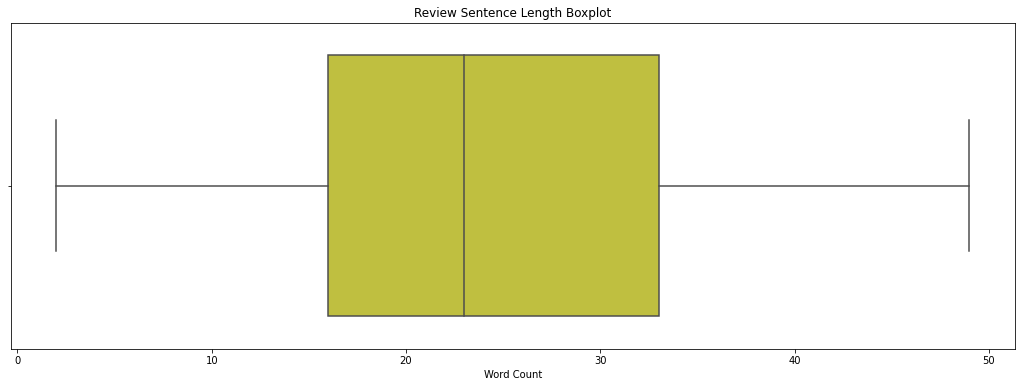

In [50]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.

import seaborn as sns


review_length = [len(x) for x in data]

mean = round(np.mean(review_length))
std = round(np.std(review_length),2)

print('Mean Review Size: ',mean)
print('Standard Deviation: ',std)

#Plot graph 

fig, ax = plt.subplots(figsize=(18,6))

sns.boxplot(review_length, color = "yellow", orient = "h", saturation = 0.5)
plt.title("Review Sentence Length Boxplot")
plt.xlabel("Word Count")


In [51]:
# - Calculate the number of unique words in the dataset

unique_words = len(set(data))
print('Number of unique words: ',unique_words)

Number of unique words:  1676


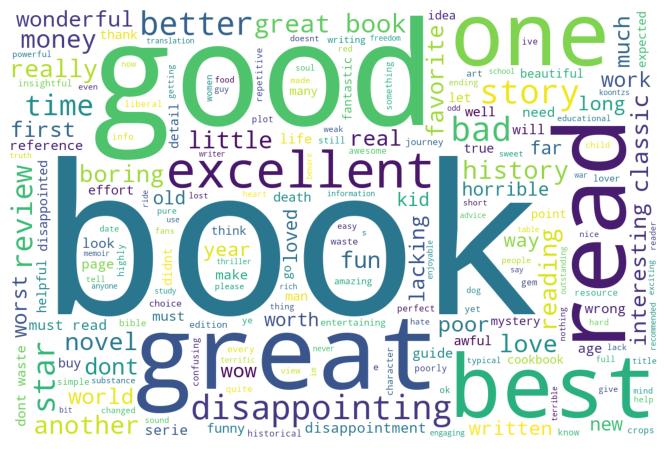

In [52]:
# - Perform any other dataset investigation that you feel would be valuable

# import wordcloud library
from wordcloud import WordCloud, STOPWORDS

# assign the data
text = " ".join(data)

# create wordcloud visualizations
word = WordCloud(width=1200, height=800, margin=10, background_color='white').generate(text)
plt.figure(figsize=(12,8))
plt.imshow(word)
plt.axis("off")
plt.margins(x=0, y=0)

It following words are commonly used in the review:

- Book 
- Best 
- Great
- Good
- Read
- Excellent
- one 
- disappointing

In [53]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


In [54]:
vocab_size

2560

# Pre-processing

In [55]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length

# import pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences

maxlen = 4 

# Set tokenised data to the same length of 4
pad_sentence = sequence.pad_sequences(tokenized_data , maxlen=maxlen)
print(pad_sentence)

[[18  4  2 19]
 [ 0  2  4  2]
 [ 0  0  0  0]
 ...
 [ 0  0  0  0]
 [ 0  0  0  6]
 [ 0  0  0  0]]


# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.


In [56]:
labels.shape

(1793, 2)

In [57]:
# import necessary packages
from sklearn.model_selection import train_test_split

#Assign data

#Independent variable, X
X = pad_sentence

#Independent variable, Y
Y = labels

# split the data 80% train, 20% test and set shuffle True
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [58]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.

def assess_model(model, X_test, Y_test):      
    
    # prediction model
    Y_pred = model.predict(X_test)  
    
    # confusion matrix
    Y_pred = to_class(Y_pred)
    Y_test = to_class(Y_test)       
    
    cm = confusion_matrix(Y_test, Y_pred)
    print('Confusion Matrix:\n')
    cm_df = pd.DataFrame(cm)    
    print(cm_df,"\n")
    
    # Classification Report
    cr = classification_report(Y_test, Y_pred, zero_division= 0)
    print("Summary:\n", cr)
    


# Build and tune model

Define network architecture

In [59]:
#import necessary libraries

from tensorflow.keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import LSTM, SpatialDropout1D, BatchNormalization, Dense, Dropout

# We shall create (recurrent neural network) RNN model
model = Sequential()

#embedding

#input_dim = number of unique words 
#output_dim = Needs to adjusted depending on output
#input_length = maxlen as all sentences have converted into 4 word length

model.add(Embedding(input_dim = vocab_size, input_length = maxlen, output_dim=10))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(32))
model.add(Dense(2, activation='softmax'))


Train model

In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 4, 10)             25600     
                                                                 
 dropout_4 (Dropout)         (None, 4, 10)             0         
                                                                 
 batch_normalization_4 (Batc  (None, 4, 10)            40        
 hNormalization)                                                 
                                                                 
 lstm_4 (LSTM)               (None, 32)                5504      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 31,210
Trainable params: 31,190
Non-trainable params: 20
_________________________________________________

In [61]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,classification_report

epochs = 5
batch_size = 10 

model.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs)        


Epoch 1/5
144/144 [==============================] - 2s 2ms/step - loss: 0.6821 - accuracy: 0.5732
Epoch 2/5
144/144 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6004
Epoch 3/5
144/144 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.6151
Epoch 4/5
144/144 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6025
Epoch 5/5
144/144 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6179


Examine performance of model

In [62]:
assess_model(model, X_test,Y_test)

Confusion Matrix:

     0    1
0  102   74
1   66  117 

Summary:
               precision    recall  f1-score   support

           0       0.61      0.58      0.59       176
           1       0.61      0.64      0.63       183

    accuracy                           0.61       359
   macro avg       0.61      0.61      0.61       359
weighted avg       0.61      0.61      0.61       359



Output_dim = 25

In [63]:
model_25 = Sequential()

model_25.add(Embedding(input_dim = vocab_size, input_length = maxlen, output_dim=25))
model_25.add(Dropout(0.2))
model_25.add(BatchNormalization())
model_25.add(LSTM(32))
model_25.add(Dense(2, activation='softmax'))

model_25.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_25.summary()

epochs = 5
batch_size = 10 

model_25.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs)    
assess_model(model_25, X_test,Y_test)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 4, 25)             64000     
                                                                 
 dropout_5 (Dropout)         (None, 4, 25)             0         
                                                                 
 batch_normalization_5 (Batc  (None, 4, 25)            100       
 hNormalization)                                                 
                                                                 
 lstm_5 (LSTM)               (None, 32)                7424      
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 71,590
Trainable params: 71,540
Non-trainable params: 50
_________________________________________________

Output_dim = 50

In [64]:
model_50 = Sequential()

model_50.add(Embedding(input_dim = vocab_size, input_length = maxlen, output_dim=25))
model_50.add(Dropout(0.2))
model_50.add(BatchNormalization())
model_50.add(LSTM(32))
model_50.add(Dense(2, activation='softmax'))

model_50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_50.summary()

epochs = 5
batch_size = 10 

model_50.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs)    
assess_model(model_50, X_test,Y_test)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 4, 25)             64000     
                                                                 
 dropout_6 (Dropout)         (None, 4, 25)             0         
                                                                 
 batch_normalization_6 (Batc  (None, 4, 25)            100       
 hNormalization)                                                 
                                                                 
 lstm_6 (LSTM)               (None, 32)                7424      
                                                                 
 dense_6 (Dense)             (None, 2)                 66        
                                                                 
Total params: 71,590
Trainable params: 71,540
Non-trainable params: 50
_________________________________________________

Output_dim = 100

In [65]:
model_100 = Sequential()

model_100.add(Embedding(input_dim = vocab_size, input_length = maxlen, output_dim=25))
model_100.add(Dropout(0.2))
model_100.add(BatchNormalization())
model_100.add(LSTM(32))
model_100.add(Dense(2, activation='softmax'))

model_100.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_100.summary()

epochs = 5
batch_size = 10

model_100.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs)    
assess_model(model_100, X_test,Y_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 4, 25)             64000     
                                                                 
 dropout_7 (Dropout)         (None, 4, 25)             0         
                                                                 
 batch_normalization_7 (Batc  (None, 4, 25)            100       
 hNormalization)                                                 
                                                                 
 lstm_7 (LSTM)               (None, 32)                7424      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 71,590
Trainable params: 71,540
Non-trainable params: 50
_________________________________________________

## Performance Summary

model_25 had the best performance which had an output_dim of 25



In [66]:
assess_model(model_25, X_test,Y_test)

Confusion Matrix:

     0    1
0  100   76
1   58  125 

Summary:
               precision    recall  f1-score   support

           0       0.63      0.57      0.60       176
           1       0.62      0.68      0.65       183

    accuracy                           0.63       359
   macro avg       0.63      0.63      0.62       359
weighted avg       0.63      0.63      0.63       359



Plot graphs for accuracy and loss

Check for any overfitting we can check the training data against the validation data and plot them on loss or accuracy vs epoch graph. If there are any points of inflection, that could indicate overfitting

In [91]:
#Training both train and test data

#Assume validation dat of 25% of training
history = model_25.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs, validation_split = 0.25)    

Epoch 1/5
108/108 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.6437 - val_loss: 0.6057 - val_accuracy: 0.6797
Epoch 2/5
108/108 [==============================] - 0s 3ms/step - loss: 0.5902 - accuracy: 0.6400 - val_loss: 0.6107 - val_accuracy: 0.6825
Epoch 3/5
108/108 [==============================] - 0s 3ms/step - loss: 0.5983 - accuracy: 0.6353 - val_loss: 0.6064 - val_accuracy: 0.6769
Epoch 4/5
108/108 [==============================] - 0s 3ms/step - loss: 0.5871 - accuracy: 0.6521 - val_loss: 0.6062 - val_accuracy: 0.6825
Epoch 5/5
108/108 [==============================] - 0s 3ms/step - loss: 0.5886 - accuracy: 0.6493 - val_loss: 0.6050 - val_accuracy: 0.6741


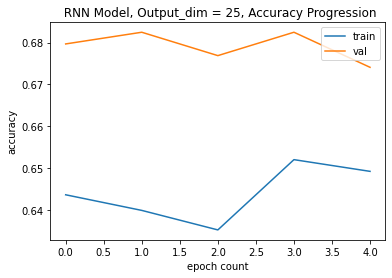

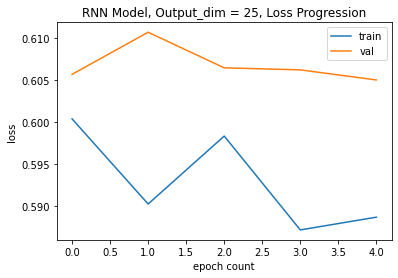

In [92]:
#Get loss and accuracy dataset
loss_train =  history.history['loss']
acc_train = history.history['accuracy']

loss_val =  history.history['val_loss']
acc_val = history.history['val_accuracy']

#Accuracy Graph
plt.plot(acc_train)
plt.plot(acc_val)

plt.title(' RNN Model, Output_dim = 25, Accuracy Progression')
plt.ylabel('accuracy')
plt.xlabel('epoch count')
plt.legend(['train','val'], loc='upper right')
plt.show()

# #Loss Graph
plt.plot(loss_train)
plt.plot(loss_val)

plt.title('RNN Model, Output_dim = 25, Loss Progression')
plt.ylabel('loss')
plt.xlabel('epoch count')
plt.legend(['train','val'], loc='upper right')
plt.show()

### Graph Analysis

Several inflection points can be observed in both the accuracy and loss progression graphs. 

For the accuracy progression graph, there are multiple inflection points in both the training andf validation lines. However, the values lies in a roughly 1% range. 

For the loss progression graph,  there are multiple inflection points in both the training and the validation lines. However, the values both lie in a 1% range maximum. 


This suggests that an epoch value of 1 is sufficient for the graph and anymore epochs could lead to overfitting of the graph. 

# Make a prediction

In [93]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=maxlen)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.

# Supply this data to each of your models and see how it does.

prediction = model_25.predict(padded)

# You can call the helper function "to_word_label" to map the output of the model to the name of the class it was predicted to belong to.

to_word_label(prediction) 


['negative', 'negative', 'positive', 'negative', 'negative']

See below for the results of the predictions

"this book is fabulous" - Incorrect  
"i hated this book" - correct  
"the best" - correct  
"no good" - correct  
"okay" - incorrect  

The model was able to predict the sentiment of 3 sentences correctly. This result is similar to the model_25's accuracy

The sentence if the word "okay" would be difficult word to determine the sentiment. The definition of "okay" is adequate but not remarkable. This will be difficult for the model to determine this is actually a positive review. 

To improve this model, the sentiment analaysis should have a rating feature as only having two options, 'positive' and 'negative' can lead to simplication of a person's sentiment. 

# References

https://stackoverflow.com/questions/67703871/importerror-cannot-import-name-to-categorical-from-keras-utils-usr-local
https://www.youtube.com/watch?v=LfnrRPFhkuY&list=LL&index=1  
https://www.youtube.com/watch?v=Y2wfIKQyd1I&list=LL&index=2  
https://www.youtube.com/watch?v=S8tpSG6Q2H0  
https://www.thefreedictionary.com/okay  
https://stackoverflow.com/questions/36952763/how-to-return-history-of-validation-loss-in-keras  
https://keras.io/getting_started/faq/#in-fit-how-is-the-validation-split-computed  
https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit  